# Data Project - Stock Market Analysis

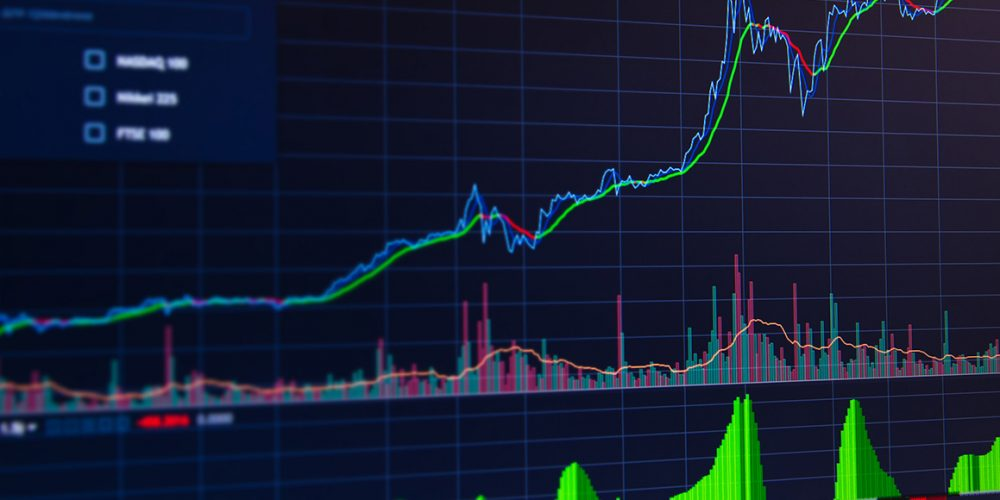

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\HP\stocks.csv")
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [3]:
print(df.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [4]:
print(df.columns)


Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


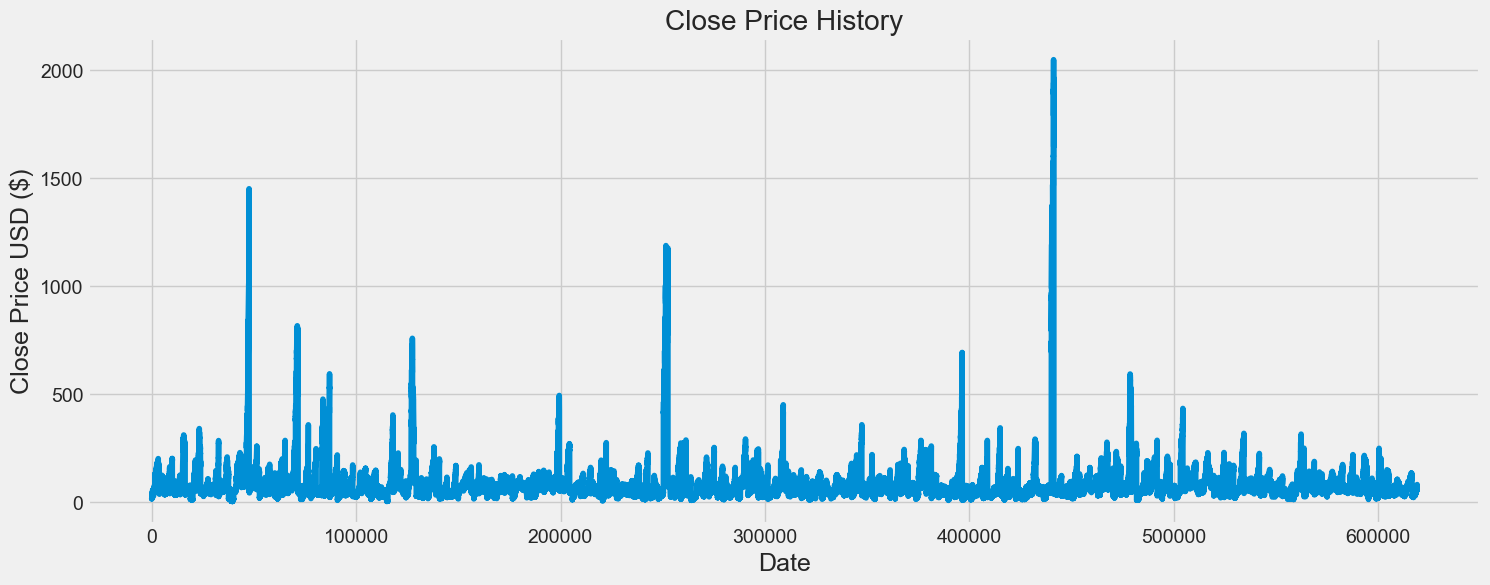

In [5]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

588088

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00642763],
       [0.00628599],
       [0.00619319],
       ...,
       [0.0352836 ],
       [0.03501009],
       [0.03529825]])

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00642763, 0.00628599, 0.00619319, 0.00638367, 0.00605643,
       0.00630553, 0.00618831, 0.00573407, 0.00575361, 0.0058513 ,
       0.00558266, 0.00569988, 0.00577315, 0.00578292, 0.00587083,
       0.00601247, 0.00608574, 0.00633972, 0.00646182, 0.00651066,
       0.00661323, 0.00679395, 0.0069942 , 0.00716027, 0.00702839,
       0.0071798 , 0.00741913, 0.00763892, 0.00752658, 0.0074582 ,
       0.00733121, 0.00728726, 0.00735563, 0.00751193, 0.0073654 ,
       0.00691117, 0.0068086 , 0.00688675, 0.0069014 , 0.00696001,
       0.00689163, 0.00693071, 0.00713096, 0.00710654, 0.00683791,
       0.00721888, 0.00729214, 0.007087  , 0.00704793, 0.00680372,
       0.00718469, 0.00725795, 0.00714561, 0.00732633, 0.00743378,
       0.00747774, 0.00733121, 0.00749728, 0.00753635, 0.00752658])]
[0.007516813925886851]

[array([0.00642763, 0.00628599, 0.00619319, 0.00638367, 0.00605643,
       0.00630553, 0.00618831, 0.00573407, 0.00575361, 0.0058513 ,
       0.00558266, 0.00569988, 0.0

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
5881/5881 [==============================] - 1645s 278ms/step - loss: 2.1789e-05
Epoch 2/5
5881/5881 [==============================] - 1302s 221ms/step - loss: 9.4617e-06
Epoch 3/5
5881/5881 [==============================] - 1422s 242ms/step - loss: 8.9023e-06
Epoch 4/5
5881/5881 [==============================] - 1335s 227ms/step - loss: 8.9060e-06
Epoch 5/5
5881/5881 [==============================] - 2126s 362ms/step - loss: 8.2106e-06


In [10]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

968/968 [==============================] - 63s 50ms/step


2.103550450280048

C:\Users\HP\AppData\Local\Temp\ipykernel_5396\2269485014.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


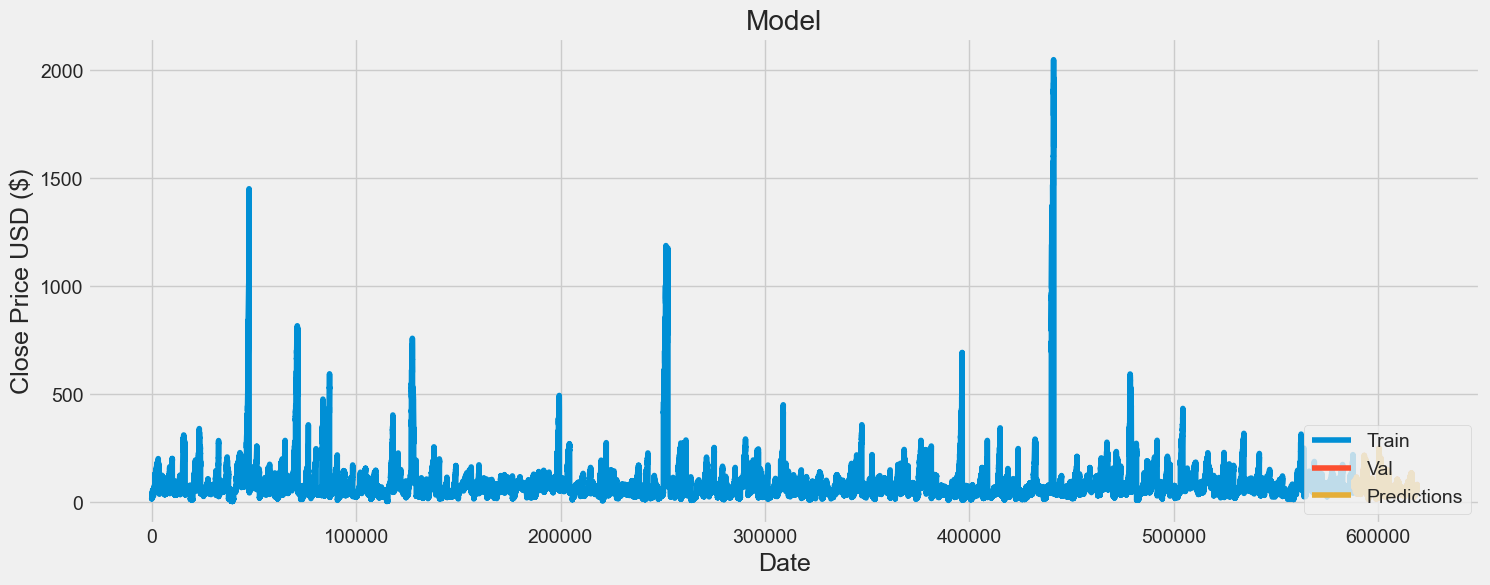

In [11]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
# Show the valid and predicted prices
valid

,close,Predictions
588088,68.47,67.932472
588089,68.61,68.589119
588090,67.77,68.735733
588091,66.75,67.926224
588092,67.38,66.906975
...,...,...
619035,77.82,76.845627
619036,76.78,77.870880
619037,73.83,76.809448
619038,73.27,73.946838


# Summary

In this notebook, you discovered and explored stock data.

Specifically, you learned:

How to load stock market data from the YAHOO Finance website using yfinance.
How to explore and visualize time-series data using Pandas, Matplotlib, and Seaborn.
How to measure the correlation between stocks.
How to measure the risk of investing in a particular stock.
Do you have any questions? Ask your questions in the comments below and I will do my best to answer.

References: https://www.investopedia.com/terms/c/correlation.asp Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization